In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# from prophet import Prophet
import plotly.express as px
import plotly.figure_factory as ff

import warnings
from soupsieve import select
warnings.filterwarnings('ignore')
1
# Shows all columns 
pd.set_option("display.max_columns", None)

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
# !python -m pip install prophet


In [3]:
from prophet import Prophet


In [4]:
# C:\Users\Ramshankar\OneDrive - iLink Systems Inc\Documents\Costco\Dataset\Final Output\Weekly
    
    
    
data = pd.read_excel("C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Dataset\\Final Output\\Weekly\\Data_Weekly.xlsx")

In [5]:
data.columns

Index(['Location', 'Item', 'Date', 'Quantity', 'Amount'], dtype='object')

In [6]:
data["Date"].nunique()

152

In [7]:
for i in data["Location"].unique():
    try_df = data[data["Location"]==i]
    print(i , "-",list(try_df["Item"].unique()))

FREMONT - ['CHICKEN XXXXX - O', 'DRUMSTICKS NNNN', 'FILLET QQQQ']
HAYWARD - ['CHICKEN XXXXX - O', 'DRUMSTICKS NNNN', 'FILLET QQQQ']
LAKEWOOD - ['CHICKEN XXXXX - O', 'DRUMSTICKS NNNN', 'FILLET QQQQ']
RICHMOND CA - ['CHICKEN XXXXX - O', 'DRUMSTICKS NNNN', 'FILLET QQQQ']
S SAN FRANCISCO BUS CTR - ['BEEF OOOO - GT', 'DRUMSTICKS NNNN']


In [8]:
data.sample(5)

,Location,Item,Date,Quantity,Amount
1122,LAKEWOOD,DRUMSTICKS NNNN,2021-02-21,299.83405,296.83571
615,HAYWARD,DRUMSTICKS NNNN,2020-03-01,252.84849,250.32000
1889,S SAN FRANCISCO BUS CTR,BEEF OOOO - GT,2021-04-11,175.01755,365.78667
1488,RICHMOND CA,CHICKEN XXXXX - O,2022-05-01,39.17720,234.67143
979,LAKEWOOD,CHICKEN XXXXX - O,2021-04-25,62.23998,310.57750


In [9]:
lakehood = data[data["Location"]=="FREMONT"]
lakehood

,Location,Item,Date,Quantity,Amount
0,FREMONT,CHICKEN XXXXX - O,2020-01-05,37.02338,184.74667
1,FREMONT,CHICKEN XXXXX - O,2020-01-12,41.88978,209.03000
2,FREMONT,CHICKEN XXXXX - O,2020-01-19,86.10121,429.64500
3,FREMONT,CHICKEN XXXXX - O,2020-01-26,63.83407,318.53200
4,FREMONT,CHICKEN XXXXX - O,2020-02-02,45.32098,226.15167
...,...,...,...,...,...
451,FREMONT,FILLET QQQQ,2022-10-30,39.32734,353.55286
452,FREMONT,FILLET QQQQ,2022-11-06,43.18370,388.22143
453,FREMONT,FILLET QQQQ,2022-11-13,46.08168,414.27429
454,FREMONT,FILLET QQQQ,2022-11-20,33.08978,297.47714


In [10]:
lakehood.Item.unique()

array(['CHICKEN XXXXX - O', 'DRUMSTICKS NNNN', 'FILLET QQQQ'],
      dtype=object)

In [11]:
lakehood_chkn = lakehood[lakehood["Item"]=="CHICKEN XXXXX - O"]
lakehood_chkn

,Location,Item,Date,Quantity,Amount
0,FREMONT,CHICKEN XXXXX - O,2020-01-05,37.02338,184.74667
1,FREMONT,CHICKEN XXXXX - O,2020-01-12,41.88978,209.03000
2,FREMONT,CHICKEN XXXXX - O,2020-01-19,86.10121,429.64500
3,FREMONT,CHICKEN XXXXX - O,2020-01-26,63.83407,318.53200
4,FREMONT,CHICKEN XXXXX - O,2020-02-02,45.32098,226.15167
...,...,...,...,...,...
147,FREMONT,CHICKEN XXXXX - O,2022-10-30,38.62533,231.36571
148,FREMONT,CHICKEN XXXXX - O,2022-11-06,52.30117,313.28400
149,FREMONT,CHICKEN XXXXX - O,2022-11-13,41.52302,248.72286
150,FREMONT,CHICKEN XXXXX - O,2022-11-20,36.94252,221.28571


In [12]:
# gb_chicken = lakehood_chkn.groupby("Date")["Quantity"].sum().reset_index().sort_values(by="Date")
# gb_chicken.head()

In [13]:
lakehood_chkn.shape

(152, 5)

In [14]:
lakehood_chkn.rename(columns={"Date": "ds", "Quantity": "y"}, inplace=True)
lakehood_chkn.tail()

,Location,Item,ds,y,Amount
147,FREMONT,CHICKEN XXXXX - O,2022-10-30,38.62533,231.36571
148,FREMONT,CHICKEN XXXXX - O,2022-11-06,52.30117,313.28400
149,FREMONT,CHICKEN XXXXX - O,2022-11-13,41.52302,248.72286
150,FREMONT,CHICKEN XXXXX - O,2022-11-20,36.94252,221.28571
151,FREMONT,CHICKEN XXXXX - O,2022-11-27,28.98025,173.59167


In [15]:
future = pd.DataFrame(lakehood_chkn.iloc[-30:,:]["ds"],columns=["ds"])

In [16]:
future.shape

(30, 1)

In [17]:
train_data = lakehood_chkn.iloc[:-30,:]
train_data.shape

(122, 5)

In [18]:
train_data.tail()

,Location,Item,ds,y,Amount
117,FREMONT,CHICKEN XXXXX - O,2022-04-03,45.78255,274.23750
118,FREMONT,CHICKEN XXXXX - O,2022-04-10,71.82971,430.26000
119,FREMONT,CHICKEN XXXXX - O,2022-04-17,44.06711,263.96200
120,FREMONT,CHICKEN XXXXX - O,2022-04-24,43.08514,258.08000
121,FREMONT,CHICKEN XXXXX - O,2022-05-01,55.80034,334.24400


In [22]:
# Modelling - Prophet
m = Prophet().fit(train_data)
pred_new = m.predict(future)

13:20:31 - cmdstanpy - INFO - Chain [1] start processing
13:20:32 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
pred_new[["ds","yhat"]].head()

,ds,yhat
0,2022-05-08,47.01540
1,2022-05-15,50.88334
2,2022-05-22,47.90547
3,2022-05-29,41.36310
4,2022-06-05,38.71834


In [25]:
output = lakehood_chkn.iloc[-30:,:].merge(pred_new[["ds","yhat"]],left_on="ds",right_on="ds",how="inner")
output["ds"] = pd.to_datetime(output["ds"])
# output.to_excel("weekly_try_chicken_30.xlsx",index=False)

In [26]:
data_prd= lakehood_chkn.iloc[-30:,:].merge(pred_new[["ds","yhat"]],left_on="ds",right_on="ds",how="inner")

<AxesSubplot:>

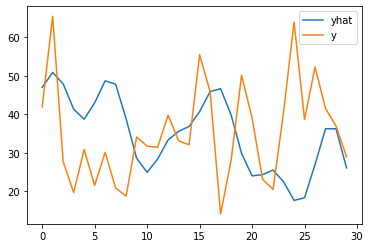

In [27]:
# data_prd[['yhat', 'y']].plot()

### Moving Average:

In [24]:


  
data1 = pd.read_excel("C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Dataset\\Final Output\\Weekly\\Data_Moving_avg.xlsx")

In [25]:
data1

,Date,Quantity,Amount,Mv_Qty,Mv_Amt,Location,Item
0,2020-01-19,86.10121,429.64500,55.00479,274.47389,FREMONT,CHICKEN XXXXX - O
1,2020-01-26,63.83407,318.53200,63.94169,319.06900,FREMONT,CHICKEN XXXXX - O
2,2020-02-02,45.32098,226.15167,65.08542,324.77622,FREMONT,CHICKEN XXXXX - O
3,2020-02-09,44.33307,221.22200,51.16270,255.30189,FREMONT,CHICKEN XXXXX - O
4,2020-02-16,48.16767,240.35667,45.94057,229.24344,FREMONT,CHICKEN XXXXX - O
...,...,...,...,...,...,...,...
2094,2022-10-30,113.51292,146.43167,113.89578,146.92556,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2095,2022-11-06,97.40439,125.65167,107.07925,138.13222,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2096,2022-11-13,93.24030,120.28000,101.38587,130.78778,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2097,2022-11-20,94.38113,121.75167,95.00861,122.56111,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN


In [26]:
data2 = data1[['Date', 'Mv_Qty', 'Location', 'Item']]

In [27]:
data3= data2[(data2['Location']== 'FREMONT') & (data2['Item']== 'CHICKEN XXXXX - O') ]

In [28]:
data3['Date'].values

array(['2020-01-19T00:00:00.000000000', '2020-01-26T00:00:00.000000000',
       '2020-02-02T00:00:00.000000000', '2020-02-09T00:00:00.000000000',
       '2020-02-16T00:00:00.000000000', '2020-02-23T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-03-08T00:00:00.000000000',
       '2020-03-15T00:00:00.000000000', '2020-03-22T00:00:00.000000000',
       '2020-03-29T00:00:00.000000000', '2020-04-05T00:00:00.000000000',
       '2020-04-12T00:00:00.000000000', '2020-04-19T00:00:00.000000000',
       '2020-04-26T00:00:00.000000000', '2020-05-03T00:00:00.000000000',
       '2020-05-10T00:00:00.000000000', '2020-05-17T00:00:00.000000000',
       '2020-05-24T00:00:00.000000000', '2020-05-31T00:00:00.000000000',
       '2020-06-07T00:00:00.000000000', '2020-06-14T00:00:00.000000000',
       '2020-06-21T00:00:00.000000000', '2020-06-28T00:00:00.000000000',
       '2020-07-05T00:00:00.000000000', '2020-07-12T00:00:00.000000000',
       '2020-07-19T00:00:00.000000000', '2020-07-26

In [29]:
train = data3[data3['Date']<= '2022-05-01']
test = data3[data3['Date']>= '2022-05-01']

In [30]:
train.shape, test.shape

((120, 4), (31, 4))

In [31]:
train.drop(['Location', 'Item'], axis=1, inplace=True)

In [32]:
train

,Date,Mv_Qty
0,2020-01-19,55.00479
1,2020-01-26,63.94169
2,2020-02-02,65.08542
3,2020-02-09,51.16270
4,2020-02-16,45.94057
...,...,...
115,2022-04-03,51.12479
116,2022-04-10,53.36157
117,2022-04-17,53.89313
118,2022-04-24,52.99399


In [33]:
train= train.rename(columns= {'Date': 'ds', 'Mv_Qty': 'y'})

In [34]:
model = Prophet()
model.fit(train)

01:28:39 - cmdstanpy - INFO - Chain [1] start processing
01:28:39 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
test1= test.drop(['Mv_Qty', 'Location', 'Item'], axis=1)
test1= test1.rename(columns= {'Date': 'ds'})
test1.head()

,ds
119,2022-05-01
120,2022-05-08
121,2022-05-15
122,2022-05-22
123,2022-05-29


In [36]:
forecasted = model.predict(test1)

In [39]:
forecasted.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-05-01,41.63706,16.85100,57.18528,41.63706,41.63706,-6.02240,-6.02240,-6.02240,-6.02240,-6.02240,-6.02240,0.00000,0.00000,0.00000,35.61466
1,2022-05-08,41.00256,13.71170,57.45114,41.00101,41.00286,-5.94611,-5.94611,-5.94611,-5.94611,-5.94611,-5.94611,0.00000,0.00000,0.00000,35.05644
2,2022-05-15,40.36806,17.02184,59.73141,40.35469,40.38088,-2.22617,-2.22617,-2.22617,-2.22617,-2.22617,-2.22617,0.00000,0.00000,0.00000,38.14189
3,2022-05-22,39.73356,19.99877,61.94732,39.70146,39.76711,1.70408,1.70408,1.70408,1.70408,1.70408,1.70408,0.00000,0.00000,0.00000,41.43764
4,2022-05-29,39.09906,20.63662,62.91185,39.03493,39.15994,2.32396,2.32396,2.32396,2.32396,2.32396,2.32396,0.00000,0.00000,0.00000,41.42302


In [40]:
forecasted_df= forecasted[['ds', 'yhat']]

In [41]:
# forecasted_df[['ds', 'yhat']].plot()

In [42]:
data4= data3.rename(columns= {'Date':'ds', 'Mv_Qty': 'y'})

In [43]:
data_merge= pd.merge(data4,forecasted_df, on= ['ds'], how ='inner' )

In [44]:
data_merge

,ds,y,Location,Item,yhat
0,2022-05-01,47.65087,FREMONT,CHICKEN XXXXX - O,35.61466
1,2022-05-08,46.94124,FREMONT,CHICKEN XXXXX - O,35.05644
2,2022-05-15,54.41286,FREMONT,CHICKEN XXXXX - O,38.14189
3,2022-05-22,45.05632,FREMONT,CHICKEN XXXXX - O,41.43764
4,2022-05-29,37.63646,FREMONT,CHICKEN XXXXX - O,41.42302
5,2022-06-05,26.08838,FREMONT,CHICKEN XXXXX - O,38.35246
6,2022-06-12,24.01842,FREMONT,CHICKEN XXXXX - O,36.11880
7,2022-06-19,27.49883,FREMONT,CHICKEN XXXXX - O,37.55903
8,2022-06-26,24.15693,FREMONT,CHICKEN XXXXX - O,40.57580
9,2022-07-03,23.22768,FREMONT,CHICKEN XXXXX - O,40.09126


<AxesSubplot:>

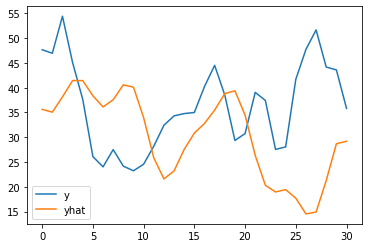

In [46]:
data_merge[['y', 'yhat']].plot()

In [47]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [48]:
mean_squared_error(data_merge.y, data_merge.yhat)

213.1046918193954

In [49]:
import math 

math.sqrt(mean_squared_error(data_merge.y, data_merge.yhat))

14.59810576134436

### All in one 

In [50]:
data2

,Date,Mv_Qty,Location,Item
0,2020-01-19,55.00479,FREMONT,CHICKEN XXXXX - O
1,2020-01-26,63.94169,FREMONT,CHICKEN XXXXX - O
2,2020-02-02,65.08542,FREMONT,CHICKEN XXXXX - O
3,2020-02-09,51.16270,FREMONT,CHICKEN XXXXX - O
4,2020-02-16,45.94057,FREMONT,CHICKEN XXXXX - O
...,...,...,...,...
2094,2022-10-30,113.89578,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2095,2022-11-06,107.07925,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2096,2022-11-13,101.38587,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2097,2022-11-20,95.00861,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN


In [52]:
for i in data2['Location'].unique():
    df= data2[data2['Location']==i]
#     print(df)
    for j in df['Item'].unique():
        item_df= df[df['Item']==j]
#         print(item_df)
        
        print("\n")
        print("Preparing data for modelling")
        item_df= item_df.drop(['Location', 'Item'], axis=1)
        item_df= item_df.rename(columns={'Date':'ds', 'Mv_Qty': 'y'})
        
        train = item_df[item_df['ds']<= '2022-05-01']
        test = item_df[item_df['ds']>= '2022-05-01']
        test1= test.drop(['y'], axis=1)
        
        print("\n")
        print(f"Model Training initiated for {i} and {j}")
        model = Prophet()
        model.fit(train)
        
        print("Model forecasting")
        forecasted = model.predict(test1)
        forecasted_df= forecasted[['ds', 'yhat']]
        
        print("Merging forecasting and test data")
        data_merge= pd.merge(test,forecasted_df, on= ['ds'], how ='inner')
        
#         print("\n")
        print(f"Tranining complted for {i} and {j}")
        print("Finding error matrices MSE and RMSE")
        MSE_Score = mean_squared_error(data_merge.y, data_merge.yhat)
        print(f'Train Score {i}-{j}: %.2f MSE' % (MSE_Score))
        
        RMSE_Score = math.sqrt(mean_squared_error(data_merge.y, data_merge.yhat))
        print(f'Train Score {i}-{j}: %.2f RMSE' % (RMSE_Score))
        
        col_names =  ['MSE_Score', 'RMSE_Score']
        Error_matric= pd.DataFrame(columns = col_names)
        
        my_out = {'MSE_Score': MSE_Score, 'RMSE_Score': RMSE_Score}
        Error_matric.loc[len(Error_matric)] = my_out 
        
        Error_matric['Location']=i
        Error_matric['Item']=j
        
        
        print(f'Writing error matrices of {i} and {j}')
        print("\n")
        Error_output = "ModelOut\All_out\moving_avg\Error\Output_Error -" +i+"-"+j+".xlsx"
        Error_matric.to_excel(Error_output, index= False)
        
        #Saving Results 
        forecasted_df['Location']= i
        forecasted_df['Item']=j
        
        print("\n")
        print(f'Writing predicted results of {i} and {j}')
        predction_output = "ModelOut\All_out\moving_avg\Output\Output -" +i+"-"+j+".xlsx"
        forecasted_df.to_excel(predction_output, index= False)
        
        
        

01:42:29 - cmdstanpy - INFO - Chain [1] start processing
01:42:29 - cmdstanpy - INFO - Chain [1] done processing




Preparing data for modelling


Model Training initiated for FREMONT and CHICKEN XXXXX - O
Model forecasting


01:42:29 - cmdstanpy - INFO - Chain [1] start processing
01:42:29 - cmdstanpy - INFO - Chain [1] done processing


Merging forecasting and test data


Tranining complted for FREMONT and CHICKEN XXXXX - O
Train Score FREMONT-CHICKEN XXXXX - O: 213.10 MSE
Train Score FREMONT-CHICKEN XXXXX - O: 14.60 RMSE
Writing error matrices of FREMONT and CHICKEN XXXXX - O




Writing predicted results of FREMONT and CHICKEN XXXXX - O


Preparing data for modelling


Model Training initiated for FREMONT and DRUMSTICKS NNNN
Model forecasting


01:42:29 - cmdstanpy - INFO - Chain [1] start processing
01:42:29 - cmdstanpy - INFO - Chain [1] done processing


Merging forecasting and test data


Tranining complted for FREMONT and DRUMSTICKS NNNN
Train Score FREMONT-DRUMSTICKS NNNN: 8855.97 MSE
Train Score FREMONT-DRUMSTICKS NNNN: 94.11 RMSE
Writing error matrices of FREMONT and DRUMSTICKS NNNN




Writing predicted results of FREMONT and DRUMSTICKS NNNN


Preparing data for modelling


Model Training initiated for FREMONT and FILLET QQQQ
Model forecasting


01:42:30 - cmdstanpy - INFO - Chain [1] start processing


Merging forecasting and test data


Tranining complted for FREMONT and FILLET QQQQ
Train Score FREMONT-FILLET QQQQ: 33.51 MSE
Train Score FREMONT-FILLET QQQQ: 5.79 RMSE
Writing error matrices of FREMONT and FILLET QQQQ




Writing predicted results of FREMONT and FILLET QQQQ


Preparing data for modelling


Model Training initiated for HAYWARD and CHICKEN XXXXX - O


01:42:30 - cmdstanpy - INFO - Chain [1] done processing


Model forecasting
Merging forecasting and test data


Tranining complted for HAYWARD and CHICKEN XXXXX - O
Train Score HAYWARD-CHICKEN XXXXX - O: 761.35 MSE
Train Score HAYWARD-CHICKEN XXXXX - O: 27.59 RMSE
Writing error matrices of HAYWARD and CHICKEN XXXXX - O




Writing predicted results of HAYWARD and CHICKEN XXXXX - O


Preparing data for modelling


Model Training initiated for HAYWARD and DRUMSTICKS NNNN


01:42:30 - cmdstanpy - INFO - Chain [1] start processing
01:42:30 - cmdstanpy - INFO - Chain [1] done processing


Model forecasting


01:42:31 - cmdstanpy - INFO - Chain [1] start processing


Merging forecasting and test data


Tranining complted for HAYWARD and DRUMSTICKS NNNN
Train Score HAYWARD-DRUMSTICKS NNNN: 16839.41 MSE
Train Score HAYWARD-DRUMSTICKS NNNN: 129.77 RMSE
Writing error matrices of HAYWARD and DRUMSTICKS NNNN




Writing predicted results of HAYWARD and DRUMSTICKS NNNN


Preparing data for modelling


Model Training initiated for HAYWARD and FILLET QQQQ


01:42:31 - cmdstanpy - INFO - Chain [1] done processing


Model forecasting


01:42:31 - cmdstanpy - INFO - Chain [1] start processing


Merging forecasting and test data


Tranining complted for HAYWARD and FILLET QQQQ
Train Score HAYWARD-FILLET QQQQ: 165.14 MSE
Train Score HAYWARD-FILLET QQQQ: 12.85 RMSE
Writing error matrices of HAYWARD and FILLET QQQQ




Writing predicted results of HAYWARD and FILLET QQQQ


Preparing data for modelling


Model Training initiated for LAKEWOOD and CHICKEN XXXXX - O


01:42:31 - cmdstanpy - INFO - Chain [1] done processing


Model forecasting


01:42:32 - cmdstanpy - INFO - Chain [1] start processing


Merging forecasting and test data


Tranining complted for LAKEWOOD and CHICKEN XXXXX - O
Train Score LAKEWOOD-CHICKEN XXXXX - O: 267.52 MSE
Train Score LAKEWOOD-CHICKEN XXXXX - O: 16.36 RMSE
Writing error matrices of LAKEWOOD and CHICKEN XXXXX - O




Writing predicted results of LAKEWOOD and CHICKEN XXXXX - O


Preparing data for modelling


Model Training initiated for LAKEWOOD and DRUMSTICKS NNNN


01:42:32 - cmdstanpy - INFO - Chain [1] done processing


Model forecasting


01:42:32 - cmdstanpy - INFO - Chain [1] start processing
01:42:32 - cmdstanpy - INFO - Chain [1] done processing


Merging forecasting and test data


Tranining complted for LAKEWOOD and DRUMSTICKS NNNN
Train Score LAKEWOOD-DRUMSTICKS NNNN: 15533.20 MSE
Train Score LAKEWOOD-DRUMSTICKS NNNN: 124.63 RMSE
Writing error matrices of LAKEWOOD and DRUMSTICKS NNNN




Writing predicted results of LAKEWOOD and DRUMSTICKS NNNN


Preparing data for modelling


Model Training initiated for LAKEWOOD and FILLET QQQQ
Model forecasting
Merging forecasting and test data


Tranining complted for LAKEWOOD and FILLET QQQQ
Train Score LAKEWOOD-FILLET QQQQ: 86.52 MSE
Train Score LAKEWOOD-FILLET QQQQ: 9.30 RMSE
Writing error matrices of LAKEWOOD and FILLET QQQQ




Writing predicted results of LAKEWOOD and FILLET QQQQ


Preparing data for modelling


Model Training initiated for RICHMOND CA and CHICKEN XXXXX - O


01:42:32 - cmdstanpy - INFO - Chain [1] start processing
01:42:32 - cmdstanpy - INFO - Chain [1] done processing


Model forecasting


01:42:33 - cmdstanpy - INFO - Chain [1] start processing


Merging forecasting and test data


Tranining complted for RICHMOND CA and CHICKEN XXXXX - O
Train Score RICHMOND CA-CHICKEN XXXXX - O: 567.75 MSE
Train Score RICHMOND CA-CHICKEN XXXXX - O: 23.83 RMSE
Writing error matrices of RICHMOND CA and CHICKEN XXXXX - O




Writing predicted results of RICHMOND CA and CHICKEN XXXXX - O


Preparing data for modelling


Model Training initiated for RICHMOND CA and DRUMSTICKS NNNN


01:42:33 - cmdstanpy - INFO - Chain [1] done processing


Model forecasting
Merging forecasting and test data


Tranining complted for RICHMOND CA and DRUMSTICKS NNNN
Train Score RICHMOND CA-DRUMSTICKS NNNN: 17136.14 MSE
Train Score RICHMOND CA-DRUMSTICKS NNNN: 130.91 RMSE
Writing error matrices of RICHMOND CA and DRUMSTICKS NNNN

01:42:33 - cmdstanpy - INFO - Chain [1] start processing
01:42:33 - cmdstanpy - INFO - Chain [1] done processing







Writing predicted results of RICHMOND CA and DRUMSTICKS NNNN


Preparing data for modelling


Model Training initiated for RICHMOND CA and FILLET QQQQ
Model forecasting


01:42:34 - cmdstanpy - INFO - Chain [1] start processing


Merging forecasting and test data


Tranining complted for RICHMOND CA and FILLET QQQQ
Train Score RICHMOND CA-FILLET QQQQ: 760.25 MSE
Train Score RICHMOND CA-FILLET QQQQ: 27.57 RMSE
Writing error matrices of RICHMOND CA and FILLET QQQQ




Writing predicted results of RICHMOND CA and FILLET QQQQ


Preparing data for modelling


Model Training initiated for S SAN FRANCISCO BUS CTR and BEEF OOOO - GT


01:42:34 - cmdstanpy - INFO - Chain [1] done processing


Model forecasting
Merging forecasting and test data


Tranining complted for S SAN FRANCISCO BUS CTR and BEEF OOOO - GT
Train Score S SAN FRANCISCO BUS CTR-BEEF OOOO - GT: 3244.38 MSE
Train Score S SAN FRANCISCO BUS CTR-BEEF OOOO - GT: 56.96 RMSE
Writing error matrices of S SAN FRANCISCO BUS CTR and BEEF OOOO - GT






01:42:34 - cmdstanpy - INFO - Chain [1] start processing
01:42:34 - cmdstanpy - INFO - Chain [1] done processing


Writing predicted results of S SAN FRANCISCO BUS CTR and BEEF OOOO - GT


Preparing data for modelling


Model Training initiated for S SAN FRANCISCO BUS CTR and DRUMSTICKS NNNN
Model forecasting
Merging forecasting and test data


Tranining complted for S SAN FRANCISCO BUS CTR and DRUMSTICKS NNNN
Train Score S SAN FRANCISCO BUS CTR-DRUMSTICKS NNNN: 716.27 MSE
Train Score S SAN FRANCISCO BUS CTR-DRUMSTICKS NNNN: 26.76 RMSE
Writing error matrices of S SAN FRANCISCO BUS CTR and DRUMSTICKS NNNN




Writing predicted results of S SAN FRANCISCO BUS CTR and DRUMSTICKS NNNN


In [53]:
import pandas as pd
import os
import glob

In [56]:
path = 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Code\\ModelOut\\All_out\\\moving_avg\\Output\\'
out_files = glob.glob(os.path.join(path, "*.xlsx"))

dfs= []


for f in out_files:
    dfs.append(pd.read_excel(f))
df_out=pd.concat(dfs, ignore_index=True)

In [57]:
df_out

,ds,yhat,Location,Item
0,2022-05-01,35.61466,FREMONT,CHICKEN XXXXX - O
1,2022-05-08,35.05644,FREMONT,CHICKEN XXXXX - O
2,2022-05-15,38.14189,FREMONT,CHICKEN XXXXX - O
3,2022-05-22,41.43764,FREMONT,CHICKEN XXXXX - O
4,2022-05-29,41.42302,FREMONT,CHICKEN XXXXX - O
...,...,...,...,...
429,2022-10-30,107.85482,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
430,2022-11-06,101.69509,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
431,2022-11-13,94.68202,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
432,2022-11-20,89.94374,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN


In [63]:
data2.shape

(2099, 4)

In [60]:
df_out= df_out.rename(columns= {'ds': 'Date', 'yhat': 'Forecasted_Qty'})
data2= data2.rename(columns= {'Mv_Qty': 'Moving_Avg_Qty'})

In [61]:
data_merge= pd.merge(data2,df_out, on= ['Date', 'Location', 'Item'], how= 'left')

In [62]:
data_merge

,Date,Moving_Avg_Qty,Location,Item,Forecasted_Qty
0,2020-01-19,55.00479,FREMONT,CHICKEN XXXXX - O,NaN
1,2020-01-26,63.94169,FREMONT,CHICKEN XXXXX - O,NaN
2,2020-02-02,65.08542,FREMONT,CHICKEN XXXXX - O,NaN
3,2020-02-09,51.16270,FREMONT,CHICKEN XXXXX - O,NaN
4,2020-02-16,45.94057,FREMONT,CHICKEN XXXXX - O,NaN
...,...,...,...,...,...
2094,2022-10-30,113.89578,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,107.85482
2095,2022-11-06,107.07925,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,101.69509
2096,2022-11-13,101.38587,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,94.68202
2097,2022-11-20,95.00861,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,89.94374


In [64]:
data_merge['Forecasted_Qty'] =data_merge['Forecasted_Qty'].fillna(0)

In [66]:
data_merge.to_excel('Prophet_Forecast_Weekly_All.xlsx', index=False)

In [67]:
path = 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Code\\ModelOut\\All_out\\\moving_avg\\Error\\'
error_files = glob.glob(os.path.join(path, "*.xlsx"))

len(error_files)

dfs_err= []


for f in error_files:
    dfs_err.append(pd.read_excel(f))
dfs_err=pd.concat(dfs_err, ignore_index=True)



In [68]:
dfs_err.to_excel('Error_Output_all_Prophet_Weekly.xlsx', index=False)